	label 	K=20 	K=40 	K=60 
	zxb	1.000 	0.950 	0.633 
	nm	1.000 	1.000 	1.000 
	sy	1.000 	1.000 	1.000 
	tsg	1.000 	1.000 	1.000 
	mhb	1.000 	0.725 	0.500 
	sjz	1.000 	1.000 	1.000 
	tyht	1.000 	1.000 	1.000 
	other	0.500 	0.400 	0.300 


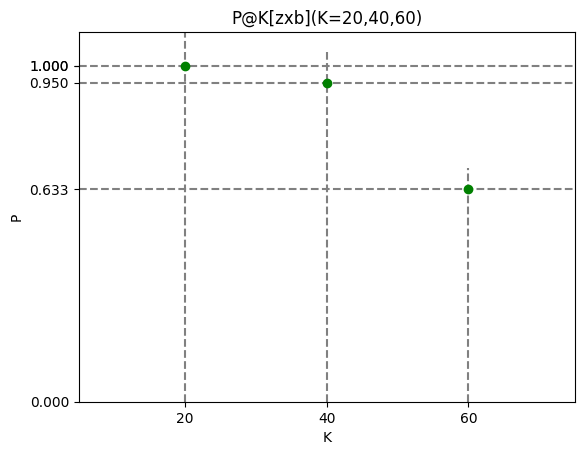

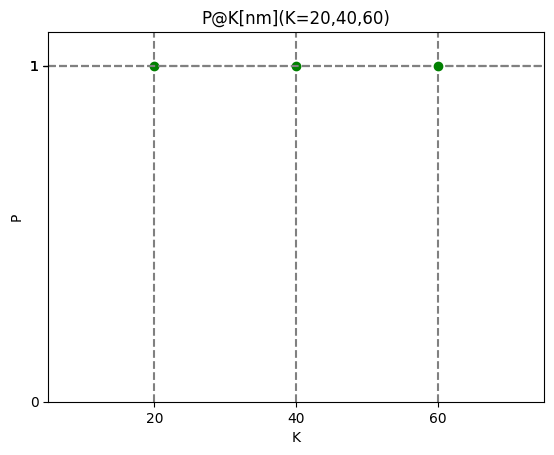

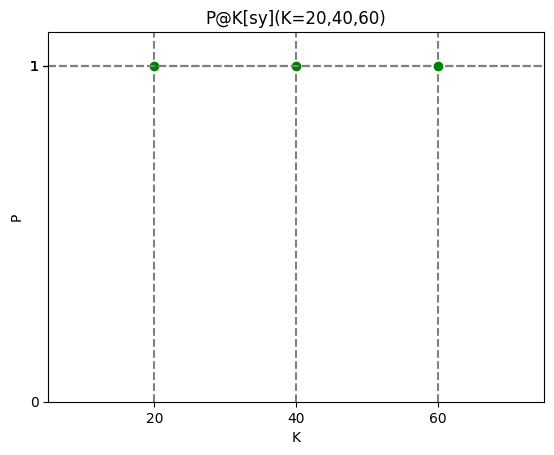

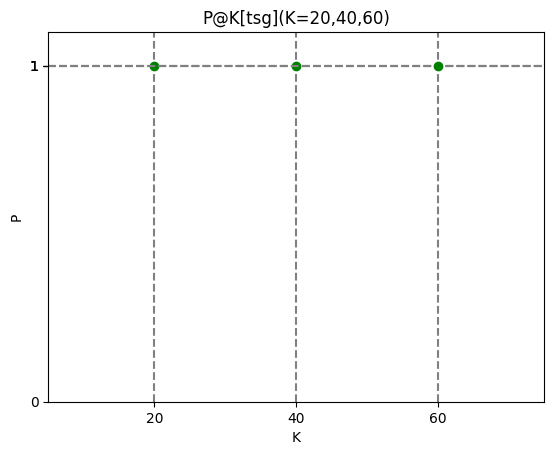

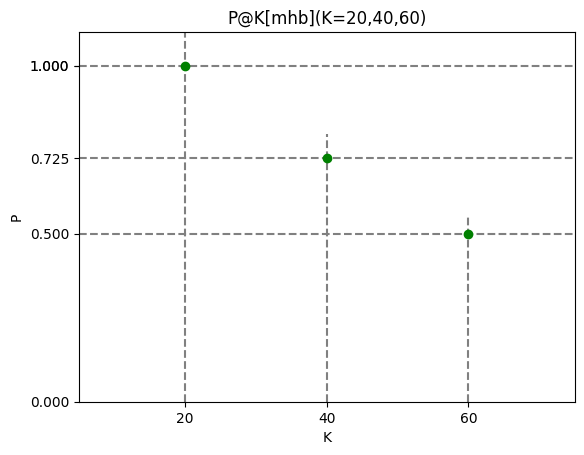

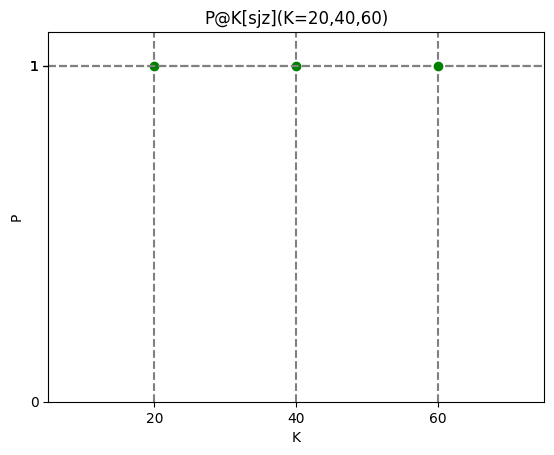

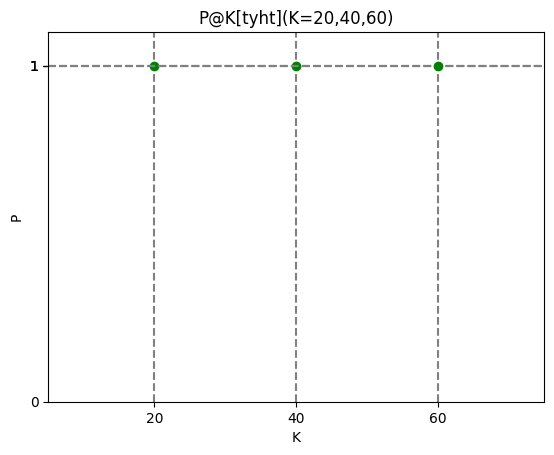

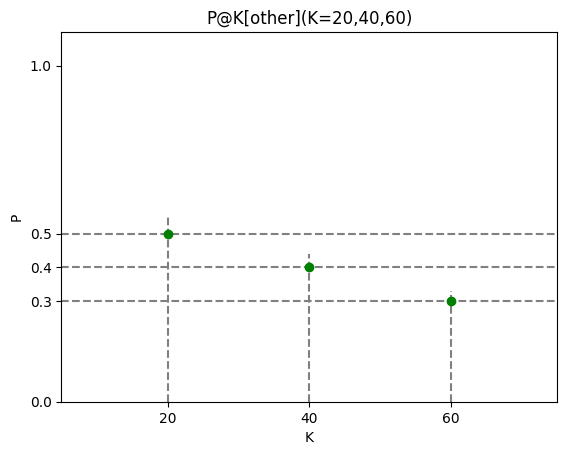

In [14]:
import matplotlib.pyplot as plt
import numpy as np


labels = ["zxb", "nm", "sy", "tsg", "mhb", "sjz", "tyht", "other"]

label_dict = {}
for i, tag in enumerate(labels):
    label_dict[tag] = i

source_file = 'topK_densenet.npy'
target_dir = "../plot/DenseNet/"

numpr = np.load(source_file)

# 0.920863

print((""+("\t%s "*4))%("label", "K=20", "K=40", "K=60"))
for i in range(numpr.shape[0])[0:]:
    topK = numpr[i]
    topK[:, 0], topK[:, 1] = topK[:, 1], topK[:, 0]
    P = np.array([topK[20][1]/20, topK[40][1]/40, topK[60][1]/60])
    K = [20, 40, 60]
    print(("\t%s"+("\t%.3f "*3))%(labels[i], P[0], P[1], P[2]))
    plt.figure(i+1)
    plt.axis([5, 75, 0, 1.1])
    plt.xlabel("K")
    plt.ylabel("P")
    plt.title("P@K[%s](K=20,40,60)" % labels[i])
    plt.xticks(np.arange(0, 80, 20)[1:])
    plt.yticks(np.concatenate([np.arange(0, 1.1, 1), P]))
    for i in range(3):
        plt.axhline(P[i], 0, 20+i*20, color='grey', linestyle='--')
        plt.axvline(20+i*20, 0, P[i], color='grey', linestyle='--')
        plt.plot(20+i*20, P[i], "go")
    plt.savefig(target_dir + labels[i] + ".png")
